In [1]:
from create_graph import TSPGraphCreator
import configparser
from test_solution import get_graph_data
from TSP import TSP
from SimulatedAnnealing import SimulatedAnnealing
from graph_from_csv import GraphCreator
import pandas as pd
import itertools
from GenerateData import generate_data
import time

(['Hub', 'Location4', 'Location1', 'Location3', 'Location2'], 0.0)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

config = configparser.ConfigParser()
config.read('config.ini')
db_host = config.get('Database', 'DB_HOST')
db_user = config.get('Database', 'DB_USER')
db_password = config.get('Database', 'DB_PASSWORD')

vrp_graph = TSPGraphCreator(db_host, db_user, db_password)
vrp_graph.create_vrp_graph()
vrp_graph.close()

In [4]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'Hub')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


(['Hub', 'Location4', 'Location1', 'Location3', 'Location2'], 0.0)


In [48]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters)
best_results

[((4000, 0.1, 10), 43.0, 0.00043129920959472656),
 ((2000, 0.1, 10), 43.0, 0.0005364418029785156),
 ((1000, 0.1, 10), 43.0, 0.000705718994140625),
 ((1000, 0.3, 10), 43.0, 0.0007531642913818359),
 ((1000, 0.1, 20), 43.0, 0.0007727146148681641),
 ((4000, 0.3, 10), 43.0, 0.0010449886322021484),
 ((4000, 0.1, 20), 43.0, 0.0011055469512939453),
 ((2000, 0.3, 10), 43.0, 0.001321554183959961),
 ((2000, 0.1, 20), 43.0, 0.0015685558319091797),
 ((1000, 0.3, 20), 43.0, 0.0017044544219970703),
 ((1000, 0.1, 40), 43.0, 0.0020596981048583984),
 ((1000, 0.6, 10), 43.0, 0.002152681350708008),
 ((4000, 0.1, 40), 43.0, 0.002596139907836914),
 ((2000, 0.3, 20), 43.0, 0.0027587413787841797),
 ((4000, 0.3, 20), 43.0, 0.0028002262115478516),
 ((2000, 0.6, 10), 43.0, 0.0031507015228271484),
 ((2000, 0.1, 40), 43.0, 0.003500223159790039),
 ((4000, 0.6, 10), 43.0, 0.003753662109375),
 ((1000, 0.3, 40), 43.0, 0.00558161735534668),
 ((4000, 0.3, 40), 43.0, 0.007125139236450195),
 ((1000, 0.6, 20), 43.0, 0.0073

(4000, 0.1, 10)


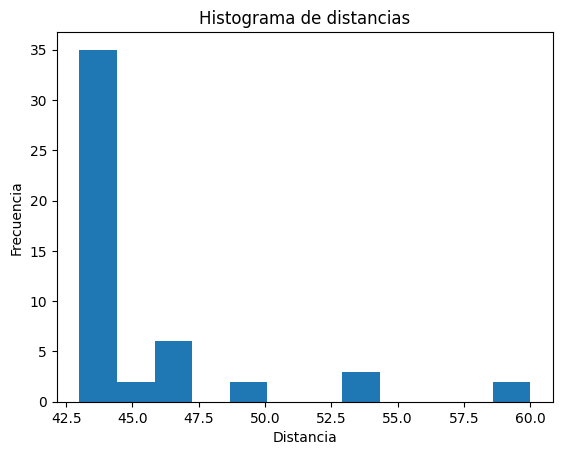

In [49]:
print(best_results[0][0])
SimulatedAnnealing.plot_n_results(simulated_annealing, 50, 10, *best_results[0][0])


In [50]:
df = pd.read_csv('random_distance_matrix.csv')
df.fillna(-1, inplace=True)
graph_creator = GraphCreator(db_host, db_user, db_password)
graph_creator.create_graph(df)
graph_creator.close()

In [51]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'l1')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


(['l1', 'l11', 'l9', 'l7', 'l2', 'l8', 'l13', 'l14', 'l10', 'l5', 'l15', 'l6', 'l12', 'l3', 'l4'], 51.0)


In [52]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=30)
best_results

[((2000, 0.6, 10), 55.0, 0.005888938903808594),
 ((1000, 0.3, 40), 57.0, 0.011646509170532227),
 ((4000, 0.1, 10), 59.0, 0.0013515949249267578),
 ((2000, 0.1, 10), 59.0, 0.0014264583587646484),
 ((1000, 0.1, 20), 59.0, 0.0017066001892089844),
 ((4000, 0.3, 10), 59.0, 0.0024864673614501953),
 ((2000, 0.1, 20), 59.0, 0.002881765365600586),
 ((4000, 0.1, 20), 59.0, 0.003424406051635742),
 ((1000, 0.1, 40), 59.0, 0.003859281539916992),
 ((2000, 0.3, 20), 59.0, 0.004763603210449219),
 ((1000, 0.6, 10), 59.0, 0.005354166030883789),
 ((4000, 0.3, 20), 59.0, 0.005793571472167969),
 ((4000, 0.6, 10), 59.0, 0.006594181060791016),
 ((4000, 0.1, 40), 59.0, 0.007049083709716797),
 ((1000, 0.6, 20), 59.0, 0.013808488845825195),
 ((4000, 0.3, 40), 59.0, 0.014010190963745117),
 ((2000, 0.3, 40), 59.0, 0.0143585205078125),
 ((4000, 0.6, 20), 59.0, 0.018444299697875977),
 ((1000, 0.6, 40), 59.0, 0.03974175453186035),
 ((2000, 0.6, 40), 59.0, 0.04166984558105469),
 ((4000, 0.6, 40), 59.0, 0.0538556575775

(2000, 0.6, 10)


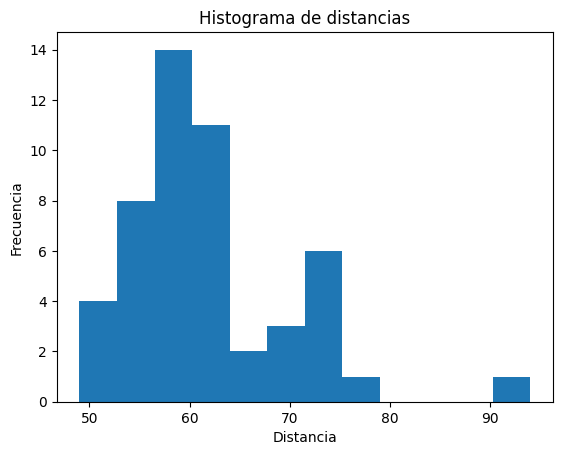

In [53]:
print(best_results[0][0])
simulated_annealing.plot_n_results(50, 10, *best_results[0][0])

In [54]:
for n in [5, 10, 20, 40, 60]:
    generate_data(n)

    # Create graph
    df = pd.read_csv('distance_matrix.csv')
    df.fillna(-1, inplace=True)
    graph_creator = GraphCreator(db_host, db_user, db_password)
    graph_creator.create_graph(df)
    graph_creator.close()

    print(f"Matriz de tamaño {n}")
    %timeit simulated_annealing.best_of_x(10, 10, *best_results[0][0])
    

Matriz de tamaño 5
77.9 ms ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 10
71.1 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 20
71.2 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 40
70.4 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño 60
75.7 ms ± 4.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
